# Unsupervised Learning

Finding patterns in the labelled or un labelled data. 

Note :- In unspervised learning ,we do not have predicter and target variable.We will have only set of labelled or unlabelled data.

By using unsupervised learning ,we can create classes among the data by forming various clusters.

Its also know as data mining tech.

##### What is clustering?

clustering means grouping of objects based on the information found in the data,describe the object and their relationship.

The goal is that objects in one group will be similar to one other and different from objects in another group.


##### clustering on numerical data

Note :- The coordinates on the graph depend up on the number of features(variables)in the data.Ex :- If we have three features ,the coordinates of the particular point could be q(x,y,z).

##### K means clustering

###### Algorithm for K means clustering.
- Step 1 :- First the K number of clusters
- Step 2 :- It randomaly assign K number of centroids.
- Step 3 :- It calculate the distance between all the points to the K number of centroids
- Step4 :-  It groups the points into K number of clusters based on minimum distance between the point to the centroid.
-  step 5 :- The it again calculate the average of all the points in their respective clusters ,and check whether the value matches with the centroid of their respective clusters,if it matches then the clustering is done else move the centroid to the average point of the cluster and re-assign the points , again repeat the above steps.

##### How do we choose the optimum number of clusters?

The optimal number of clusters depend upon the minimum distance of the cluster points to its centroid,if the distance is minimum ,then the cluster is good representation of these data points.

so we decide the number of cluster based on elbow  plot.

- on x-axis we have Number of clusters 
- on Y-axis we have with in cluster distances

note - within cluster distances means ,the summation of distance between all the points to their centroids.

Note :- As the number of clusters increases ,the summation of the distances decreases,so now we need to choose the ideal number of clusters ,by seing the elbow plot ,in plot where the change in summation is very less ,in that case we take the before cluster number. 


Note:- we can not apply K-means clustering on a categorical data.AS we can not plot and calculate the distance between the categorical data.

# Practice by python

In [68]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [69]:
data=pd.read_csv("movie_metadata1.csv")
data.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000


Note :- we can apply kmeans clustering only on numeric data.so at first i am considering only two numeric columns for clustering

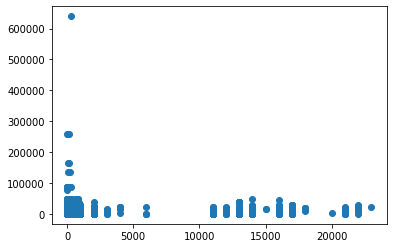

In [70]:
x=data[['director_facebook_likes','actor_1_facebook_likes']]
plt.scatter(data['director_facebook_likes'],data['actor_1_facebook_likes'])

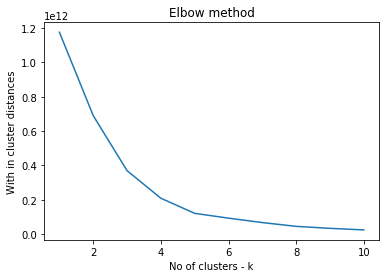

In [71]:
from sklearn.cluster import KMeans
wcd=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,random_state=0)
    model.fit(x)
    wcd.append(model.inertia_)
plt.plot(range(1,11),wcd)
plt.title("Elbow method")
plt.xlabel("No of clusters - k")
plt.ylabel("With in cluster distances")
plt.show()

In [72]:
model=KMeans(n_clusters=5,random_state=0)
y_kmeans=model.fit_predict(x)

In [73]:
pd.Series(y_kmeans).unique()

array([3, 0, 2, 1, 4])

In [74]:
x['clusters']=pd.Series(y_kmeans)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
model.cluster_centers_

array([[1.99634437e+03, 4.10860927e+04],
       [9.51428571e+01, 1.97428571e+05],
       [1.36970030e+03, 1.56083086e+04],
       [3.52661199e+02, 1.06638575e+03],
       [2.85000000e+02, 6.40000000e+05]])

# Pros and corns of Kmeans clustering

#### Pros

- Simple,understandable
- Items are automatically assigned to clusters

#### Cons

- Must define number of cluster
- All items are forced into clusters
- Unable to handle noisy data and outliers

# Fuzzy c-Means clustering

- Fuzzy clustering is a form of clustering in which each data point can belong to more than one cluster.
- K means tries to find the hard cluster ,whereas fuzzy c-means discovers the soft clusters

In a softclustering ,any point can belong to more than one cluster with a certain affinity values towards each.FUZZY c-mean assigns the degree of membership(ranging from 0 to 1)of an object to a given cluster.

Note :- This clustering method is not widely used in industries

### Pros and cons of Fuzzy c-Means clustering

##### Pros
- Allows a data point to be in multiple clusters
- A more natural representation of the behavior of genes
- Genes generally involved in multiple function

##### Cons
- Need to define C,the number of clusters
- Need to determine membership cutoff value
- clusters are sensitive to initial assignment of centroid
- Fuzzy c-means is not a deterministic algorithm

## Hierarchical clustering

Hierarchical clustering is an alternative approach which builds a hierarchy from the bottom-up ,and does not require us to specify the number of cluster beforehand

- In Hierarchical clustering ,at first every data points represent one cluster.
- Identify the closest two clusters and combine them into one cluster.
- Repeat the above steps till all the data points are in a single cluster

##### what is Dendrogram ?

A dendrogram is a tree diagram frequently used to illustrate the arrangment of the clusters produced by hierarchical clustering

Note :- The y-axis in the dendrogram is the euclidean distance

#### Distance measure

This the process of finding out the distance between two clusters.There are many ways to calculate the distance between two clusters in a Dendrogram.

- complete linkage clustering :-  In this process we find the maximum possiable distace between the data points of different distance

- Single linkage clustering :- Find the minimum possiable distance between two points belonging to two different clusters

- Mean linkage clustering :- Find all the possiable pairwise distance for the points belonging to two different clusters and then calculate the average

- centroid linkage clustering :- Find the centroid of each cluster ,then find the distance between two centroids of those two clusters

note :- The Mean linkage clustering is generally slow as compare to other distance measure.

so we generally use Single linkage clustering or centroid linkage clustering

#### How can a dendrogram tell me what is the optimal number of cluster?

what is the longest vertical line not cut by horizantal line.

- step 1 :- find out the longest perpendicular line that is cut by horizantal line.
- step 2 :- Now we shoud cut the longest perpendicular line into 2 halfs

### Why do we not use this clustering?

when we have lot of data points ,then in this case the dendrogram become like a forest.As a result of which we can not get any meaningfull information from this type of clustering.

Generally this clustering is used to know the number of optimal cluster that can be formed on k means clustering.


Text(0, 0.5, 'euclidan distance')

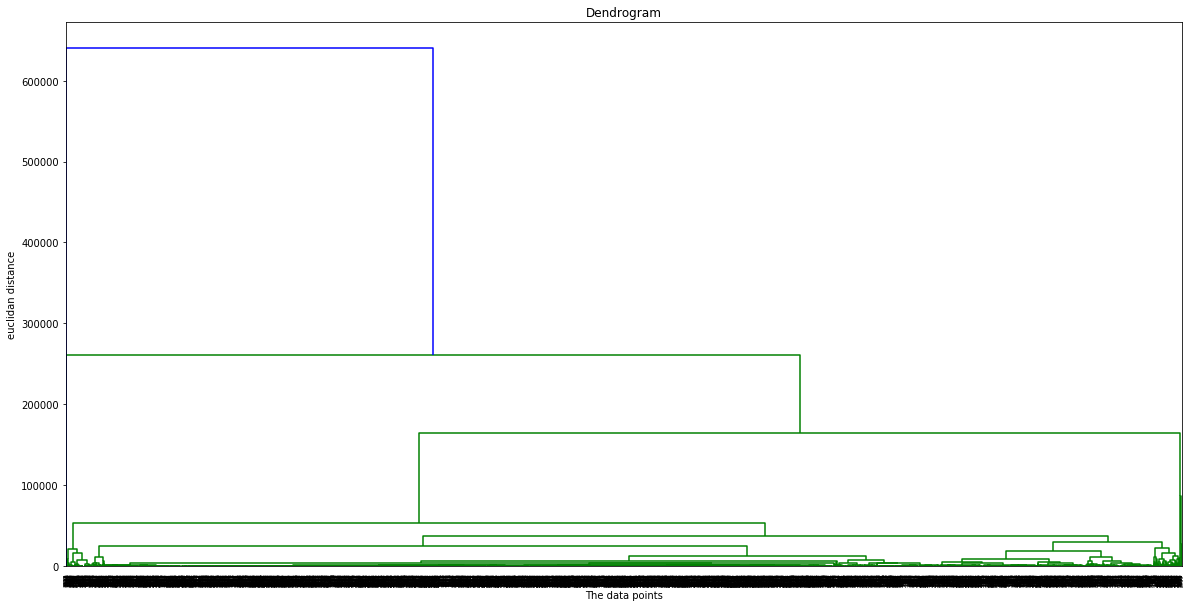

In [84]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x,method='complete'))
plt.title("Dendrogram")
plt.xlabel('The data points')
plt.ylabel("euclidan distance")

In [85]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(x)

In [86]:
y_hc

array([0, 0, 0, ..., 0, 0, 0])